# Main Project


Nesse case, iremos estudar um banco de dados de aerogeradores fornecida pela ANEEL (Agência Nacional de Energia Elétrica). Os dados são fornecidos pela seguinte url: https://sigel.aneel.gov.br/arcgis/rest/services/PORTAL/WFS/MapServer/0/query. 

Em síntese, esse estudo de caso contém:

- **Data Extraction**: por meio de Web Scrapping, os dados da Agência Nacional de Energia Elétrica sobre aerogeradores poderão ser obtidos. A biblioteca *requests* do Python foi utilizada para esse fim;

- **Data Processing**: em resumo, processamento de dados. Visualizar a natureza dos dados, fazer o tratamento dos dados e limpeza dos mesmos a fim de que a análise seja a mais clara e mais coerente possível;

- **Data Visualization** ou **Data Analysis**: fazer análise dos dados e obter insights acerca dos dados obtidos.

## Data Extraction

Para realizar a extração de dados, deve-se solicitar um requerimento para a API. Usando a biblioteca requests do Python, pode-se utilizar um Web Scrapping para obter dados a partir da API Map Server:

In [1]:
import requests
from utils import request_query
from utils import json_to_gdf

Para fazer a solicitação e extrair os dados da query, é necessário estabelecer os parâmetros de entrada corretamente. Abaixo, é possível encontrar os principais parâmetros de entrada para Map Services/Layer Queries:

- **f**: formato da resposta. Neste estudo, o formato **json** foi utilizado;
- **where** : filtro da consulta. Basicamente, seria um filtro para restringir os dados que serão retornados. **'1=1'** indica para retornar todos os registros;
- **outFields** : campos de saída. Define quais campos serão retornados. **'*'** indica que as saídas de coluna além da coluna de geometria.
- **geometry** : define a geometria espacial para a consulta.

Nesse estudo, serão utilizados apenas os parâmetros **'where', 'outFields' e 'f'.**

Portanto, de acordo com as orientações no documento desse case, pode-se realizar a solicitação:

In [2]:
url = 'https://sigel.aneel.gov.br/arcgis/rest/services/PORTAL/WFS/MapServer/0/query'
params = {
    "where": "1=1",    #Retorna-se todos os registros
    "outFields": "*",  #
    "f": "json",       # Formato do dataset a ser retornado
    #"resultRecordCount": 5 
} 

In [3]:
help(request_query)

Help on function request_query in module utils:

request_query(url, params)
    Função para fazer a request GET de uma API.
    Inputs: params:
        - f: formato da resposta. Neste estudo, o formato json foi utilizado;
        - where : filtro da consulta. Basicamente, seria um filtro para restringir os dados que serão retornados. **'1=1'** indica para retornar todos os registros;
        - outFields : campos de saída. Define quais campos serão retornados. **'*'** indica que as saídas de coluna além da coluna de geometria.
        - geometry : define a geometria espacial para a consulta.
    Output: dados a serem retornados (json, GeoJSON, HTML) de acordo com a escolha do parâmetro de entrada "f".



In [4]:
json_data = request_query(url,params)

## Data Processing

### Inicializando o .CSV

In [5]:
help(json_to_gdf)

Help on function json_to_gdf in module utils:

json_to_gdf(json_data)
    Função para criar um GeoDataFrame a partir de dados em formato JSON.
    Inputs: json_data: dados obtidos no formato JSON
    Output: GeoDataFrame junto com a longitude e a latitude concatenadas ao final do dataset.



In [6]:
gdf = json_to_gdf(json_data)

In [7]:
gdf.head(5)    # Cabeçalho do dataset

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,X,Y,...,OPERACAO,FUSO_AG,PROPRIETARIO,ORIGEM,OBJECTID,UF,CEG,geometry,LONG,LAT
0,1.85,121.25,80.0,82.5,1666625847000,30739,Caititu,CAI-083,754125.00,8398879.00,...,Sim,UTM 23 S (MER -45),Central Eólica Caititu S.A.,None,1,BA,EOLCVBA030739-4-01,POINT (-42.64249 -14.47097),-42.642495,-14.470968
1,2.00,145.00,95.0,100.0,1666625847000,30512,Dreen Boa Vista,BV07,175728.00,9433802.00,...,Sim,UTM 25 S (MER -33),GE Boa Vista S.A.,None,2,RN,EOLCVRN030512-0-01,POINT (-35.92447 -5.11575),-35.924469,-5.115754
2,2.00,145.00,95.0,100.0,1666625847000,30497,Renascença V,15,184692.00,9417056.00,...,Sim,UTM 25 S (MER -33),Renascença V Energias Renováveis S.A.,None,3,RN,EOLCVRN030497-2-01,POINT (-35.84437 -5.26742),-35.844373,-5.267424
3,2.70,150.00,89.0,122.0,1666625847000,30864,SM,1,176028.00,9397684.00,...,Sim,UTM 25 S (MER -33),Santa Maria Energias Renováveis S.A.,None,4,RN,EOLCVRN030864-1-01,POINT (-35.92329 -5.44208),-35.923294,-5.442082
4,2.10,143.70,96.2,95.0,1666625847000,30295,Colônia,AEG-08,513347.87,9608681.26,...,Sim,UTM 24 S (MER -39),Central Geradora Eólica Colônia S.A.,None,5,CE,EOLCVCE030295-3-01,POINT (-38.87983 -3.54033),-38.879826,-3.540330


In [8]:
gdf.columns    # Colunas do dataset

Index(['POT_MW', 'ALT_TOTAL', 'ALT_TORRE', 'DIAM_ROTOR', 'DATA_ATUALIZACAO',
       'EOL_VERSAO_ID', 'NOME_EOL', 'DEN_AEG', 'X', 'Y', 'VERSAO', 'DATUM_EMP',
       'OPERACAO', 'FUSO_AG', 'PROPRIETARIO', 'ORIGEM', 'OBJECTID', 'UF',
       'CEG', 'geometry', 'LONG', 'LAT'],
      dtype='object')

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   POT_MW            1000 non-null   float64 
 1   ALT_TOTAL         1000 non-null   float64 
 2   ALT_TORRE         1000 non-null   float64 
 3   DIAM_ROTOR        1000 non-null   float64 
 4   DATA_ATUALIZACAO  1000 non-null   int64   
 5   EOL_VERSAO_ID     1000 non-null   int64   
 6   NOME_EOL          1000 non-null   object  
 7   DEN_AEG           1000 non-null   object  
 8   X                 1000 non-null   float64 
 9   Y                 1000 non-null   float64 
 10  VERSAO            1000 non-null   object  
 11  DATUM_EMP         1000 non-null   object  
 12  OPERACAO          998 non-null    object  
 13  FUSO_AG           1000 non-null   object  
 14  PROPRIETARIO      1000 non-null   object  
 15  ORIGEM            0 non-null      object  
 16  OBJECTID         

Mais informações sobre o dataset:

- **'POT_MW'** : potência instalada para o aerogerador;
- **'ALT_TOTAL'** : altura total do aerogerador;
- **'ALT_TORRE'** : altura da torre do aerogerador;
- **'DIAM_ROTOR'** : diâmetro do rotor do aerogerador;
- **'DATA_ATUALIZACAO'** : Data de atualização sobre o aerogerador;
- **'NOME_EOL'** : nome do aerogerador;
- **'SETOR'** : setor (Nordeste, Norte, Sul, Sudeste, Centro-Oeste) do aerogerador;
- **'LONG'** : longitude em que se encontra o aerogerador;
- **'LAT'** : latitude em que se encontra o aerogerador.

### Limpeza do dataset:

In [10]:
colunas_vazias = gdf.columns[gdf.isnull().all()]
gdf = gdf.drop(columns=colunas_vazias)

In [11]:
gdf.head()

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,X,Y,...,DATUM_EMP,OPERACAO,FUSO_AG,PROPRIETARIO,OBJECTID,UF,CEG,geometry,LONG,LAT
0,1.85,121.25,80.0,82.5,1666625847000,30739,Caititu,CAI-083,754125.00,8398879.00,...,WGS84,Sim,UTM 23 S (MER -45),Central Eólica Caititu S.A.,1,BA,EOLCVBA030739-4-01,POINT (-42.64249 -14.47097),-42.642495,-14.470968
1,2.00,145.00,95.0,100.0,1666625847000,30512,Dreen Boa Vista,BV07,175728.00,9433802.00,...,SIRGAS2000,Sim,UTM 25 S (MER -33),GE Boa Vista S.A.,2,RN,EOLCVRN030512-0-01,POINT (-35.92447 -5.11575),-35.924469,-5.115754
2,2.00,145.00,95.0,100.0,1666625847000,30497,Renascença V,15,184692.00,9417056.00,...,SIRGAS2000,Sim,UTM 25 S (MER -33),Renascença V Energias Renováveis S.A.,3,RN,EOLCVRN030497-2-01,POINT (-35.84437 -5.26742),-35.844373,-5.267424
3,2.70,150.00,89.0,122.0,1666625847000,30864,SM,1,176028.00,9397684.00,...,SIRGAS2000,Sim,UTM 25 S (MER -33),Santa Maria Energias Renováveis S.A.,4,RN,EOLCVRN030864-1-01,POINT (-35.92329 -5.44208),-35.923294,-5.442082
4,2.10,143.70,96.2,95.0,1666625847000,30295,Colônia,AEG-08,513347.87,9608681.26,...,SIRGAS2000,Sim,UTM 24 S (MER -39),Central Geradora Eólica Colônia S.A.,5,CE,EOLCVCE030295-3-01,POINT (-38.87983 -3.54033),-38.879826,-3.540330


In [12]:
gdf.describe()    # Descrição do dataset

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,X,Y,OBJECTID,LONG,LAT
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,1.998351,135.336710,88.436560,94.033200,1.666066e+12,30796.35500,459325.511782,8.744519e+06,500.500000,-40.926449,-11.346740
std,0.575488,20.344129,14.112055,19.514632,5.938297e+09,1758.04808,235962.692897,1.045437e+06,288.819436,5.597128,9.446246
min,0.500000,64.150000,44.000000,40.000000,1.609775e+12,27908.00000,163254.000000,6.264551e+06,1.000000,-55.739351,-33.735595
25%,1.650000,123.000000,80.000000,82.500000,1.666626e+12,30308.00000,229935.500000,8.432496e+06,250.750000,-42.610450,-14.167771
50%,2.000000,130.000000,80.000000,95.000000,1.666626e+12,30563.50000,427075.550000,9.330378e+06,500.500000,-39.688261,-6.052660
75%,2.100000,148.000000,97.200000,108.000000,1.666626e+12,30974.00000,747275.180844,9.435597e+06,750.250000,-36.015915,-5.100224
max,4.200000,200.000000,125.000000,150.000000,1.689011e+12,40884.00000,831921.809333,9.703106e+06,1000.000000,-34.967500,-2.683668


Principais pontos a ser reconhecidos:

- A **média** de potência instalada é de 1.99 MW. A **máxima** é de 4.2 MW e a **mínima**, 0.5 MW;
- As médias, mínima e máxima da Altura Total e do Diâmetro do Rotor são bem definidos;
- A **média** de longitude e latitude (-40.9264, -11.3467) indicam onde se concentra os aerogeradores no território brasileiro.

Com essas informações, pode-se comparar com as médias de potência instalada, de altura total, de altura da torre e de diâmetro do rotor em cada setor do território brasileiro. Além disso, realizar um estudo sobre a **correlação** dessas grandezas.

Com o número de datas de atualização, também é possível inferir qual setor ou unidade federal do território brasileiro teve de aumento de capacidade instalada durante os anos de 2021 a 2023.

In [13]:
gdf.columns[gdf.isnull().all()]

Index([], dtype='object')

In [14]:
gdf.drop(columns='geometry').to_csv("outputs/output.csv",index = False) # Criação do .csv para análise no Tableau Public. Coluna de geometria retirada.

In [15]:
# Função para atribuir os setores do Brasil de acordo com as UFs:

setores = {
    "Norte": ["AC", "AM", "AP", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Centro-Oeste": ["DF", "GO", "MT", "MS"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Sul": ["PR", "RS", "SC"]
}

def atribuir_setor(uf):
    for setor, ufs in setores.items():
        if uf in ufs:
            return setor
    return None

gdf['SETOR'] = gdf['UF'].apply(atribuir_setor)

In [16]:
gdf.head()

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,X,Y,...,OPERACAO,FUSO_AG,PROPRIETARIO,OBJECTID,UF,CEG,geometry,LONG,LAT,SETOR
0,1.85,121.25,80.0,82.5,1666625847000,30739,Caititu,CAI-083,754125.00,8398879.00,...,Sim,UTM 23 S (MER -45),Central Eólica Caititu S.A.,1,BA,EOLCVBA030739-4-01,POINT (-42.64249 -14.47097),-42.642495,-14.470968,Nordeste
1,2.00,145.00,95.0,100.0,1666625847000,30512,Dreen Boa Vista,BV07,175728.00,9433802.00,...,Sim,UTM 25 S (MER -33),GE Boa Vista S.A.,2,RN,EOLCVRN030512-0-01,POINT (-35.92447 -5.11575),-35.924469,-5.115754,Nordeste
2,2.00,145.00,95.0,100.0,1666625847000,30497,Renascença V,15,184692.00,9417056.00,...,Sim,UTM 25 S (MER -33),Renascença V Energias Renováveis S.A.,3,RN,EOLCVRN030497-2-01,POINT (-35.84437 -5.26742),-35.844373,-5.267424,Nordeste
3,2.70,150.00,89.0,122.0,1666625847000,30864,SM,1,176028.00,9397684.00,...,Sim,UTM 25 S (MER -33),Santa Maria Energias Renováveis S.A.,4,RN,EOLCVRN030864-1-01,POINT (-35.92329 -5.44208),-35.923294,-5.442082,Nordeste
4,2.10,143.70,96.2,95.0,1666625847000,30295,Colônia,AEG-08,513347.87,9608681.26,...,Sim,UTM 24 S (MER -39),Central Geradora Eólica Colônia S.A.,5,CE,EOLCVCE030295-3-01,POINT (-38.87983 -3.54033),-38.879826,-3.540330,Nordeste


In [17]:
gdf = gdf.drop(columns=gdf.columns[gdf.isnull().all()])

In [18]:
gdf.drop(columns='geometry').to_csv("outputs/output_setores.csv",index = False)

In [19]:
gdf['DATA_ATUALIZACAO']

0      1666625847000
1      1666625847000
2      1666625847000
3      1666625847000
4      1666625847000
           ...      
995    1666625847000
996    1666625847000
997    1666625847000
998    1666625847000
999    1666625847000
Name: DATA_ATUALIZACAO, Length: 1000, dtype: int64

In [20]:
gdf.drop(columns='geometry').to_csv("outputs/output.csv",index = False)

### DATA_ATUALIZACAO -> timestamp()

In [21]:
import pandas as pd
gdf['DATA_ATUALIZACAO'] = pd.to_datetime(gdf['DATA_ATUALIZACAO'], unit='ms')

In [22]:
gdf

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,X,Y,...,OPERACAO,FUSO_AG,PROPRIETARIO,OBJECTID,UF,CEG,geometry,LONG,LAT,SETOR
0,1.85,121.25,80.00,82.5,2022-10-24 15:37:27,30739,Caititu,CAI-083,754125.0000,8.398879e+06,...,Sim,UTM 23 S (MER -45),Central Eólica Caititu S.A.,1,BA,EOLCVBA030739-4-01,POINT (-42.64249 -14.47097),-42.642495,-14.470968,Nordeste
1,2.00,145.00,95.00,100.0,2022-10-24 15:37:27,30512,Dreen Boa Vista,BV07,175728.0000,9.433802e+06,...,Sim,UTM 25 S (MER -33),GE Boa Vista S.A.,2,RN,EOLCVRN030512-0-01,POINT (-35.92447 -5.11575),-35.924469,-5.115754,Nordeste
2,2.00,145.00,95.00,100.0,2022-10-24 15:37:27,30497,Renascença V,15,184692.0000,9.417056e+06,...,Sim,UTM 25 S (MER -33),Renascença V Energias Renováveis S.A.,3,RN,EOLCVRN030497-2-01,POINT (-35.84437 -5.26742),-35.844373,-5.267424,Nordeste
3,2.70,150.00,89.00,122.0,2022-10-24 15:37:27,30864,SM,1,176028.0000,9.397684e+06,...,Sim,UTM 25 S (MER -33),Santa Maria Energias Renováveis S.A.,4,RN,EOLCVRN030864-1-01,POINT (-35.92329 -5.44208),-35.923294,-5.442082,Nordeste
4,2.10,143.70,96.20,95.0,2022-10-24 15:37:27,30295,Colônia,AEG-08,513347.8700,9.608681e+06,...,Sim,UTM 24 S (MER -39),Central Geradora Eólica Colônia S.A.,5,CE,EOLCVCE030295-3-01,POINT (-38.87983 -3.54033),-38.879826,-3.540330,Nordeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.00,149.38,108.38,82.0,2022-10-24 15:37:27,30285,Mangue Seco 1,MS1-09,798708.0000,9.425974e+06,...,Sim,UTM 24 S (MER -39),Eólica Mangue Seco 1 – Geradora e Comercializa...,996,RN,EOLCVRN030285-6-01,POINT (-36.30599 -5.18791),-36.305990,-5.187911,Nordeste
996,2.00,149.38,108.00,82.0,2022-10-24 15:37:27,30349,Cerro Chato II,AEG 9,625380.3248,6.586389e+06,...,Sim,UTM 21 S (MER -57),Eletrosul Centrais Elétricas S.A.,997,RS,EOLCVRS030349-6-01,POINT (-55.68869 -30.84925),-55.688688,-30.849248,Sul
997,2.00,145.00,95.00,100.0,2022-10-24 15:37:27,30527,Renascença III,UG9,177982.0380,9.413603e+06,...,Sim,UTM 25 S (MER -33),Energisa Geração - Central Eólica Renascença I...,998,RN,EOLCVRN030527-8-01,POINT (-35.90497 -5.29835),-35.904970,-5.298351,Nordeste
998,1.60,121.25,80.00,82.5,2022-10-24 15:37:27,30328,Guanambi,GUA_12,755777.0000,8.428659e+06,...,Sim,UTM 23 S (MER -45),Centrais Eólicas Guanambi Ltda.,999,BA,EOLCVBA030328-3-01,POINT (-42.63041 -14.20218),-42.630413,-14.202182,Nordeste


In [23]:
gdf.drop(columns='geometry').to_csv("outputs/output.csv",index = False)

## Data Visualization - Insights

Para obter uma visualização inicial dos dados com a estatística, as bibliotecas *seaborn* e *matplotlib* foram utilizadas. A princípio, é importante visualizar a correlação entre as grandezas numéricas desse dataset. 

In [24]:
#Configurando as bibliotecas para visualização

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Greens')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

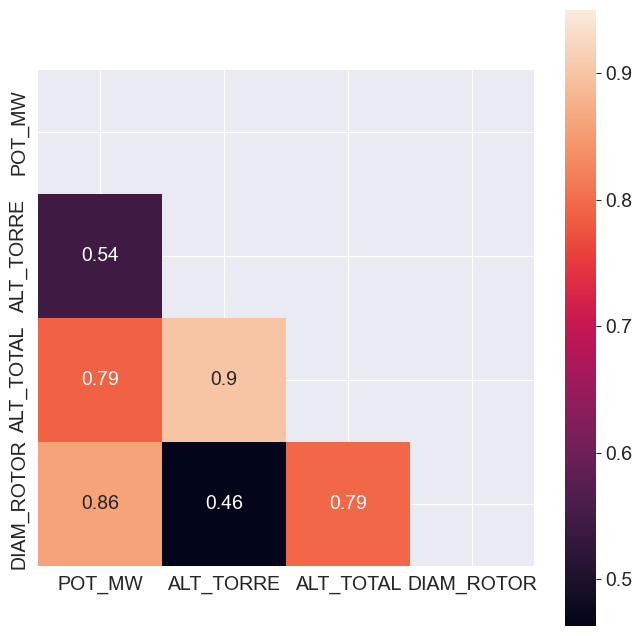

In [25]:
# Correlação entre as grandezas do dataset

raw_data=['POT_MW',  'ALT_TORRE','ALT_TOTAL', 'DIAM_ROTOR']
# matriz de correlação
corrmat = gdf[raw_data].corr()
# tamanho da figura
fig = plt.figure(figsize = (8, 8))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .95,mask=mask, square = True, annot = True)
plt.show()

Principais pontos a serem observados:

- **Alta correlação** entre o diâmetro do rotor e a potência instalada: quanto maior o diâmetro do rotor, maior a potência instalada;
- **Alta correlação** entre a altura total e a potência instalada: quanto maior a altura total, maior será a capacidade de gerar energia do aerogerador.
- **Alta correlação** entre a altura total e a altura da torre.

Em contrapartida, tem-se que:

- Não há correlação (ou baixa correlação) entre a altura da torre e a potência instalada;
- Não há correlação (ou baixa correlação) entre a altura da torre e o diâmetro do rotor.

Em resumo, pode-se afirmar que:

- Alta correlação entre a potência instalada e o diâmetro do rotor;

- Alta correlação entre altura total e potência instalada;

Dessa forma:

- Evidencia-se que turbinas com rotores maiores tendem a gerar mais energia e;
- Evidencia-se que torre mais altas resultam em maior capacidade de geração de energia.

## Conclusão

Para uma maior análise dos dados, um *dashboard* foi criado no site *Tableau Public*. Uma gama maior de tabelas e gráficos foram feitas para analisar os dados de aerogeradores.

De acordo com esses dashboards, em resumo, foi possível concluir que:

- O setor Nordeste possui a maior média de potência instalada por número de aerogeradores;

- O setor Sudeste possui a menor média de potência instalada por número de aerogeradores;

- Nota-se que o setor Nordeste há enorme investimento para a geração de energia eólica e para parques eólicos e maior eficiência comparado a outros setores e que baixa média do setor Sudeste pode estar associado a condições climáticas menos favoráveis ou projetos de menor escala comparados aos de outros setores.

- O nordeste possui a maior número de aerogeradores por média de capacidade instalada. Com isso, evidencia-se a alta densidade de aerogeradores para maximizar a eficiência produtiva do setor Nordeste.

- Alta correlação entre a potência instalada e o diâmetro do rotor. Portanto, evidencia-se que turbinas com rotores maiores tendem a gerar mais energia;

- Alta correlação entre altura total e potência instalada, logo evidencia-se que torre mais altas resultam em maior capacidade de geração de energia.

- Grande correlação entre a quantidade de atualizações de aerogeradores e a soma de potências instaladas: Quanto maior a soma de potências instaladas, maior a taxa de atualização e/ou de manutenção de aerogeradores.

- Grande quantidade de atualizações no setor Nordeste. Isso evidencia que ainda há altos investimentos na região.
